In [9]:
import pandas as pd

df = pd.read_csv(
    r"C:\Users\a817628\OneDrive - ATOS\Desktop\Data Analytics\Py\Codecademy\text_classification_with_sklearn\imdb_dataset.csv"
)
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


##### Goal: create a machine learning model that will predict whether a review is positive or negative.

In [4]:
# take a sample of 10000 rows to make processing faster and get imbalance
# 9000 positives & 1000 negatives
df_positive = df[df['sentiment'] == 'positive'][:9000]
df_negative = df[df['sentiment'] == 'negative'][:1000]

# concat df_positive and df_negative
# imb = imbalanced; the number of observations per class is not equally distributed
df_reviews_imb = pd.concat([df_positive, df_negative], axis=0) 

In [5]:
# verify if data is imbalanced
df_reviews_imb.value_counts('sentiment')

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

#### 1. Dealing with imbalanced class

<Axes: xlabel='sentiment'>

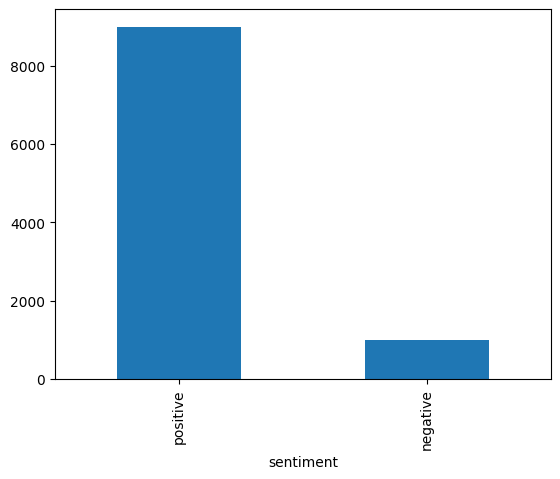

In [8]:
# plot bar to show how data is distributed
df_reviews_imb.value_counts('sentiment').plot(
    kind='bar'
)

1.1 Balancing data with .sample()

In [ ]:
# calculate the length of the negative reviews
length_negative = len(df_reviews_imb[df_reviews_imb['sentiment'] == 'negative'])
length_negative

1000

In [15]:
# extract sample from positive reviews
df_reviews_positive = df_reviews_imb[df_reviews_imb['sentiment'] == 'positive'].sample(n=length_negative)

In [17]:
df_reviews_negative = df_reviews_imb[df_reviews_imb['sentiment'] == 'negative']

In [19]:
pd.concat([df_reviews_negative, df_reviews_positive]).value_counts('sentiment')

sentiment
negative    1000
positive    1000
Name: count, dtype: int64

In [ ]:
df_reviews_bal = pd.concat([df_reviews_negative, df_reviews_positive])
# bal = balanced

In [23]:
# reset index
df_reviews_bal.reset_index(drop=True, inplace=True)
df_reviews_bal

,review,sentiment
0,Basically there's a family where a little boy ...,negative
1,"This show was an amazing, fresh & innovative i...",negative
2,Encouraged by the positive comments about this...,negative
3,Phil the Alien is one of those quirky films wh...,negative
4,I saw this movie when I was about 12 when it c...,negative
...,...,...
1995,"hello, looking for a movie for the family to w...",positive
1996,52-Pick Up never got the respect it should hav...,positive
1997,A great suspenseful thriller the acting is fir...,positive
1998,Faith and Mortality... viewed through the lens...,positive


1.2. Balancing data with RandomUserSampler

In [29]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0) # rus = RandomUnderSampler

# rus.fit_resample(x, y) # x: review column, y: sentiment column
rus.fit_resample(df_reviews_imb[['review']], df_reviews_imb['sentiment'])
# x: DataFrame, use [[]]; y: Series, use []

df_review_bal, df_review_bal['sentiment'] = rus.fit_resample(df_reviews_imb[['review']], df_reviews_imb['sentiment'])

In [31]:
df_review_bal.value_counts('sentiment')

sentiment
negative    1000
positive    1000
Name: count, dtype: int64

2. Split data into train and test

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split

# create train and test DataFrames
train, test = train_test_split(df_reviews_bal, test_size=0.33, random_state=42)